In [7]:
import numpy as np
import cv2
import os
import csv

# Function to load nose coordinates from file
def load_coordinates_mouth(file):
    coordinates = []
    with open(file, 'r') as f:
        next(f)
        next(f)
        for line in f:
            data = line.split()
            coordinates.append([data[0], int(data[7]), int(data[8]), int(data[9]), int(data[10])]) # Extracting nose coordinates
    return coordinates

def crop_mouth(coordinates, size=(40, 18)):
    cropped_mouths = []
    j=0
    directory_files = "/home/constanza/tfg/TFG/thesis/img_align_celeba"
    for coord in coordinates:
        if int(coord[0].split('.')[0])>= 182638:
            full_path = os.path.join(directory_files, coord[0])
            face_image = cv2.imread(full_path)
            lm_x, lm_y, rm_x, rm_y = coord[1], coord[2],coord[3], coord[4] 
            x = (lm_x + rm_x)//2
            y = (lm_y + rm_y)//2
            cropped_mouth = face_image[y - size[1]//4:y + (size[1]//4)*3, x - size[0]//2:x + size[0]//2]
            cropped_mouths.append(cropped_mouth)
    return cropped_mouths


In [8]:
archive = "list_landmarks_align_celeba.txt"
coord = load_coordinates_mouth(archive)
print(coord[0])
cropped_mouth = crop_mouth(coord)
mean = np.mean(cropped_mouth, axis=0)
mean_m = mean.astype(np.uint8)


['000001.jpg', 73, 152, 108, 154]


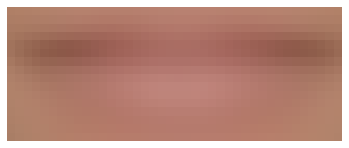

In [9]:
import matplotlib.pyplot as plt
imagen_rgb = cv2.cvtColor(mean_m, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_rgb.astype(np.uint8))
plt.axis('off')  
plt.show()

In [15]:
def replace_mouth(coordinates, delta, size=(40, 18)):
    altered_noses = []
    j=0
    directory_files = "/home/constanza/tfg/TFG/thesis/img_align_celeba"
    output_directory = "/home/constanza/tfg/TFG/thesis/mouth"
    with open('celeba-att-male-test.csv', 'r') as archivo:
        lineas = csv.reader(archivo)
        img_list_m = []
        next(lineas)
        for linea in lineas:
            img_id =linea[0]
            img_list_m.append(img_id)
    with open('celeba-att-female-test.csv', 'r') as archivo:
        lineas = csv.reader(archivo)
        img_list_f = []
        next(lineas)
        for linea in lineas:
            img_id =linea[0]
            img_list_f.append(img_id)
    for coord in coordinates:
        img_id = coord[0]
        if int(img_id.split('.')[0]) >= 182638 and img_id in img_list_m:
            full_path = os.path.join(directory_files, img_id)
            face_image = cv2.imread(full_path)
            lm_x, lm_y, rm_x, rm_y = coord[1], coord[2],coord[3], coord[4]  
            x = (lm_x + rm_x)//2
            y = (lm_y + rm_y)//2
            cropped_mouth = face_image[y - size[1]//4:y + (size[1]//4)*3, x - size[0]//2:x + size[0]//2]
            mean_color = np.mean(cropped_mouth, axis=(0, 1))  
            adjusted_mouth = mean_m * (300 / 255.0)
            face_image[y - size[1]//4:y + (size[1]//4)*3, x - size[0]//2:x + size[0]//2] = adjusted_mouth*delta + cropped_mouth*(1-delta)
            output_path = os.path.join(output_directory, img_id)
            cv2.imwrite(output_path, face_image)
        elif int(img_id.split('.')[0]) >= 182638 and img_id in img_list_f:
            full_path = os.path.join(directory_files, img_id)
            face_image = cv2.imread(full_path)
            
            lm_x, lm_y, rm_x, rm_y = coord[1], coord[2],coord[3], coord[4]  
            x = (lm_x + rm_x)//2
            y = (lm_y + rm_y)//2
            cropped_mouth = face_image[y - size[1]//4:y + (size[1]//4)*3, x - size[0]//2:x + size[0]//2]
            mean_color = np.mean(cropped_mouth, axis=(0, 1))  
            adjusted_mouth = mean_m * (300 / 255.0)
            face_image[y - size[1]//4:y + (size[1]//4)*3, x - size[0]//2:x + size[0]//2] = adjusted_mouth*delta + cropped_mouth*(1-delta)
            
            output_path = os.path.join(output_directory, img_id)
            cv2.imwrite(output_path, face_image)


In [31]:
replace_mouth(coord,0.8)

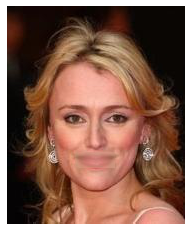

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/home/constanza/tfg/TFG/thesis/mouth/182946.jpg')
plt.imshow(img)
plt.axis('off')  # Para quitar los ejes
plt.show()

This section wants to calculate an avarage not attractive male face 

In [30]:
import os
def resize_image(image_path, target_size=(128, 128)):
    image = cv2.imread(image_path)
    
    resized_image = cv2.resize(image, target_size)
    
    return resized_image



def mean_attractive(atractive):
    directory_files = "/home/constanza/tfg/TFG/thesis/img_align_celeba"
    ppl_att = []
    for att in atractive:
        full_path = os.path.join(directory_files, att)
        face_image = cv2.imread(full_path)
        img = cv2.imread(full_path)
        resized_image = cv2.resize(img, (128, 128))
        ppl_att.append(resized_image)
    return ppl_att



In [ ]:
with open('parsed_files/correctly_UNattractive_male.csv', 'r') as f:
        next(f)
        Uatt = []
        for line in f:
            #print(line)
            linia = line.strip()
            Uatt.append(linia)


In [162]:
ppl_u = mean_attractive(Uatt)
print(Uatt[0])

182644.jpg


In [163]:
mean_u = np.mean(ppl_u, axis=0)
mean_un = mean_u.astype(np.uint8)


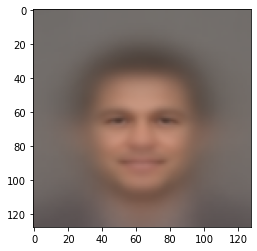

In [164]:
import matplotlib.pyplot as plt
imagen_rgb = cv2.cvtColor(mean_un, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_rgb.astype(np.uint8))
plt.show()